In [ ]:
!pip install jupyter_black
!pip install "black==22.1.0"
!pip install "edsnlp[ml]==0.20.0"
!pip install "unidecode==1.4.0"
!pip install "spacy==3.8.11"
%reload_ext jupyter_black

# Introduction to Named Entity Reocgnition (NER) and its clinical applications

This notebook will explore the world of NER, examining the underlying concepts and techniques that make it possible and showcasing real-world applications of NER in the medical domain.

# What Is Named Entity Recognition ?

At its core, Named Entity Recognition, or NER for short, is a subtask of NLP that focuses on identifying and classifying entities within textual data. These entities encompass a diverse range of information, including names of individuals, organizations, locations, dates, numerical values, and more. NER equips machines with the ability to extract these entities, making it a fundamental tool for diverse applications across various industries.

![NER_health.png](https://www.johnsnowlabs.com/wp-content/uploads/2023/04/1_0T2vy3DbBnLzI01KfGFUng.webp)

From the above image, you might have gotten some ideas about what an NER model does. The model can find different entities that are present in the text, such as persons, dates, organizations, and locations. Thus NER helps in adding more meaning to the text document. In simple words, you can say that it is doing information extraction.

# Task: Detecting drug treatment in a medical document

The objective of this class is to extract automatically with a NER method the chemical and drug names (CHEM) from medical documents.

# I. Rule-Based Approaches
Rule-based approaches are one of the earliest and simplest techniques used for named entity recognition (NER). In rule-based approaches, a set of handcrafted rules and patterns are defined to identify entities in text data.

# i. NER on one text with manual patterns


## Introduction to Spacy

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python. For more information check out the [documentation](https://spacy.io/usage/spacy-101).


## Architecture

The central data structures in spaCy are the [Language](https://spacy.io/api/language) class, the [Vocab](https://spacy.io/api/vocab) and the [Doc](https://spacy.io/api/doc) object. The `Language` class is used to process a text and turn it into a `Doc` object. It’s typically stored as a variable called `nlp`. The `Doc` object owns the **sequence of tokens** and all their annotations. The `Doc` object is constructed by the [Tokenizer](https://spacy.io/api/tokenizer), and then modified in place by the components of the pipeline.

![image.png](https://spacy.io/images/architecture.svg)

## First example

Let's try with a simple example: Extract Disorder (DISO) and the Drug name (DRUG) from the text below:

`"Le patient atteint de Covid 19 ne tolère pas le paracétamol"`


In [ ]:
import spacy

print(spacy.__version__)

In [ ]:
text = "Le patient atteint de Covid 19 ne tolère pas le paracétamol"
print(text)

## Tokenization

During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. For example, punctuation at the end of a sentence should be split off – whereas “U.K.” should remain one token. Each Doc consists of individual tokens, and we can iterate over them:

While punctuation rules are usually pretty general, tokenizer exceptions strongly depend on the specifics of the individual language. This is why each available language has its own subclass, like English or French, that loads in lists of hard-coded data and exception rules in the [spacy.blank](https://spacy.io/usage/spacy-101#annotations) method 

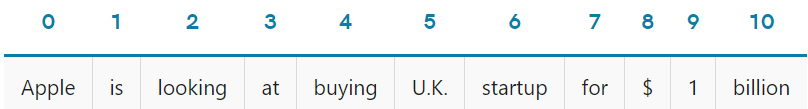

In [ ]:
# Import the NLP framework spaCy
import spacy

# Load the French language model
nlp = spacy.blank("fr")

# Apply the pipeline and get a spaCy Doc object.
doc = nlp(text)

# If you do not want to run the pipeline but only tokenize the text
doc = nlp.make_doc(text)

# Text processing in spaCy is non-destructive
doc.text == text

# You can access a specific token
token = doc[2]  # The third token

# And create a Span using slices
span = doc[:3]  # The first three tokens

print(f"The tokens: {list(doc)}\nA Span: {doc[:3]}")

## Using the entity ruler

The [EntityRuler](https://spacy.io/api/entityruler) is a pipeline component that’s typically added via [nlp.add_pipe](https://spacy.io/api/language#add_pipe). When the nlp object is called on a text, it will find matches in the doc and add them as entities to the `doc.ents`, using the specified pattern label as the entity label. If any matches were to overlap, the pattern matching most tokens takes priority. If they also happen to be equally long, then the match occurring first in the Doc is chosen.

In [ ]:
# Create a new pipeline component for entity recognition
ruler = nlp.add_pipe("entity_ruler")

## Define [Entity patterns](https://spacy.io/usage/rule-based-matching#entityruler-patterns)

Entity patterns are dictionaries with two keys: "label", specifying the label to assign to the entity if the pattern is matched, and "pattern", the match pattern. The entity ruler accepts two types of patterns:

1. Phrase patterns for exact string matches (string).

```python
{"label": "ORG", "pattern": "Apple"}
```

2. Token patterns with one dictionary describing one token (list).

```python
{"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "francisco"}]}
```


In [ ]:
# Define some patterns to match entities
patterns = [
    {
        "label": "DRUG",
        "pattern": "paracétamol",
    },  # match "PARACETAMOL" as a "Drug name"
    {
        "label": "DISO",
        "pattern": [{"LOWER": "covid"}, {"LOWER": "19"}],
    },  # match "Covid 19" as a "Disroder"
    # LOWER attribute makes it case insensitive: it matchs also "CoVId 19"
]

# Add the patterns to the entity ruler
ruler.add_patterns(patterns)


# Process some text with the pipeline
doc = nlp(text)


# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

## Visualizing the entity recognizer

The entity visualizer, `ent`, highlights named entities and their labels in a text.

In [ ]:
import spacy
from spacy import displacy

displacy.render(doc, style="ent")

**YOUR TURN !**
## Sub-task 1

Extract with the Spacy [entity_ruler](https://spacy.io/api/entityruler) pipeline the "Chemicals and Drugs" (`CHEM` label) from the text below: `Carbonate de lithium`, `antihistaminique` and `Cétirizine`.

```
"Perfusion d'une ampoule de Carbonate de lithium et introduction d'un antihistaminique par Cétirizine 10 mg x 2 par jour, avec diminution puis disparition de l'oedème."
```

In [ ]:
text = "Perfusion d'une ampoule de Carbonate de lithium et introduction d'un antihistaminique par Cétirizine 10 mg x 2 par jour, avec diminution puis disparition de l'oedème."
print(text)

In [ ]:
# Load the French language model
nlp = spacy.blank("fr")

# Create a new pipeline component for entity recognition
ruler = nlp.add_pipe("entity_ruler")

# Define some patterns to match entities

## YOUR CODE HERE (1-3 lines)
# Find the 3 patterns matching Carbonate de lithium, antihistaminique and Cétirizine
patterns = 

## END YOUR CODE

# Add the patterns to the entity ruler
ruler.add_patterns(patterns)

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

# Visualize the result
displacy.render(doc, style="ent")

### **Issue**: The pipeline does not apply to all drugs 

In [ ]:
text = "Le patient a avalé un comprimé de FLUOCARIL BI-FLUORE le matin, un doliprane le midi et deux Paracetamol le soir"

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

displacy.render(doc, style="ent")

### **Solution**: Adding all known french drug names in the pipeline's patterns

# ii. NER on one text with a knowledge dictionary

## Introducing ROMEDI database

We are using the "Référentiel Ouvert du Médicament" (ROMEDI). [ROMEDI](https://bioportal.lirmm.fr/ontologies/ROMEDI?p=summary) is a database derived from the public drug database: http://base-donnees-publique.medicaments.gouv.fr/ It was created and is maintained by the Equipe de Recherche en Informatique Appliquée à la Santé (ERIAS), Université de Bordeaux, Inserm [Cossin et al., 2019](https://ebooks.iospress.nl/publication/51952).

It contains **5789 drug names**.

## Load the drugs dictionary

In [ ]:
import json

# Path of the knowledge dictionary
drugs_dict_path = "/kaggle/input/drugs-dictionary/drugs.json"

# Opening JSON file
with open(drugs_dict_path) as json_file:
    drugs_dict = json.load(json_file)

print(drugs_dict)

## Using the entity ruler with large amount of patterns

## Sub-task 2

Add all drug names from the [ROMEDI](https://bioportal.lirmm.fr/ontologies/ROMEDI?p=summary) database to the Spacy [entity_ruler](https://spacy.io/api/entityruler) pipeline's patterns. In order to extract the "Chemicals and Drugs" (`CHEM` label) from the text below:

```
""Le patient a avalé un comprimé de FLUOCARIL BI-FLUORE le matin, un doliprane le midi et deux Paracetamol le soir"
```

*Tips*:
- Make sure it is case insensitive (Use **LOWER** atribute for token patterns).
- Make sure it matchs drugs with multiple tokens such as "FLUOCARIL BI-FLUORE".

In [ ]:
text = "Le patient a avalé un comprimé de FLUOCARIL BI-FLUORE le matin, un doliprane le midi et deux Paracetamol le soir"
print(text)

In [ ]:
# Load the French language model
nlp = spacy.blank("fr")

# Create a new pipeline component for entity recognition
ruler = nlp.add_pipe("entity_ruler")

# Define some patterns to match entities
## YOUR CODE HERE (1-4 lines)
# Find the patterns matching all drug names from ROMEDI database
# Be careful with the drugs containint multiple tokens

patterns = 

## END YOUR CODE

ruler.add_patterns(patterns)

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

# Visualize the result
displacy.render(doc, style="ent")

#### **Issue**: the pipeline does not detect drugs with **accents**

Now we have a rule-based pipeline able to detect any drugs from the ROMEDI database. **However, It does not detect drugs with accents.**

In [ ]:
text = "Le patient a avalé un comprimé de FLUOCARIL BI-FLUORE le matin, un doliprane le midi et deux Paracétamol le soir"

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

displacy.render(doc, style="ent")

### **Solution**: Normalizing the text before the NER process

## Normalization

The normalisation scheme adheres to the non-destructive doctrine. In other words,`nlp(text).text == text` is always true. To achieve this, the input text is never modified.Instead, the `norm_` attribute of each token is modified.

## Sub-task 3

Remove accents from the `norm_` attribute of each token by using the `unidecode()` function.

In [ ]:
from unidecode import unidecode


@spacy.Language.component("normalize")
def normalize(doc):
    for token in doc:
        ## YOUR CODE HERE (1 line)
        ## Remove accent from `.norm_` accent
        
        ## END YOUR CODE
    return doc

In [ ]:
# Load the French language model
nlp = spacy.blank("fr")

# Create a new pipeline component for entity recognition
nlp.add_pipe("normalize")

# Create a new pipeline component for entity recognition
ruler = nlp.add_pipe("entity_ruler")

# Define some patterns to match entities
## YOUR CODE HERE (1-4 lines)
# Use the NORM attribute instead of LOWER attribute

patterns = 

## END YOUR CODE

ruler.add_patterns(patterns)

# Process some text with the pipeline
doc = nlp(text)

# Print the recognized entities and their labels
print([(ent.text, ent.label_) for ent in doc.ents])

# Visualize the result
displacy.render(doc, style="ent")

#### Congrats

Now we have a rule-based pipeline, normalizing text and detecting any drugs from the ROMEDI database. Let's try it on a real Corpus.

In [ ]:
import edsnlp

# Load the French language model
nlp = edsnlp.blank("eds")

# Create a new pipeline component for normalization 
nlp.add_pipe("eds.normalizer")

# Create a new pipeline component for drug recognition
nlp.add_pipe("eds.drugs")

nlp.to_disk("model_rule_based")

# iii. NER on real wolrd data with multiple texts

## Introducing QUAERO 2016

The [**QUAERO French Medical Corpus**](https://quaerofrenchmed.limsi.fr/) has been initially developed as a resource for named entity recognition and normalization. It was then improved with the purpose of creating a gold standard set of normalized entities for French biomedical text, that was used in the CLEF eHealth evaluation lab.

The QUAERO dataset is divided into 2 datasets:
- MEDLINE: A selection of 2497 annotated MEDLINE titles.
- EMEA: A selection of 9 annotated EMEA documents (drug evaluation documents made by the European Medicines Agency) divided into 35 files.

### Annotation

The annotation process was guided by concepts in the [Unified Medical Language System (UMLS)](https://www.nlm.nih.gov/research/umls/index.html): Ten types of clinical entities, as defined by the following [UMLS Semantic Groups](https://lhncbc.nlm.nih.gov/semanticnetwork/download/SemGroups.txt) (Bodenreider and McCray 2003) were annotated:
- Anatomy (ANAT)
- Chemical and Drugs (CHEM)
- Devices (DEVI)
- Disorders (DISO)
- Geographic Areas (GEOG)
- Living Beings (LIVB)
- Objects (OBJC)
- Phenomena (PHEN)
- Physiology (PHYS)
- Procedures (PROC)


Annotations are available in the BRAT Rapid Annotation Tool (BRAT) standoff format, described here: http://brat.nlplab.org/standoff.html, which can be loaded into BRAT for vizualization.
![image.png](https://quaerofrenchmed.limsi.fr/images/quaeroFRmed_MEDLINE.jpg)
![image.png](https://quaerofrenchmed.limsi.fr/images/quaeroFRmed_EMEA.jpg)

### BRAT standoff format
The annotations are stored separately from the annotated document text, which is never modified by the tool.

For each text document in the system, there is a corresponding annotation file. The two are associatied by the file naming convention that their base name (file name without suffix) is the same: for example, the file `10028548.ann` contains annotations for the file `10028548.txt`.

### Text files (.txt)
Text files are expected to have the suffix `.txt` and contain the text of the original documents input into the system.

```
Analyse minéralogique et exploration des pathologies asbestosiques.
```

The document texts are stored in plain text files encoded using UTF-8 (an extension of ASCII — plain ASCII texts work also).

### Annotation files (.ann)
Annotations are stored in files with the `.ann` suffix:
```
T1	PROC 0 7	Analyse
#1	AnnotatorNotes T1	C0936012
T2	DISO 41 66	pathologies asbestosiques
#2	AnnotatorNotes T2	C0003949
```

### Have a look !

Please, go to the `quaero` data folder and have look on the different data files.

## Converting BRAT data into a list of Spacy Doc

In order to use our spacy pipeline, we need to convert the Brat data into a list of Spacy [Doc]. Thanks to the python library [EDS-NLP](https://aphp.github.io/edsnlp/), you can easily integrate BRAT into your spacy project.

The [BratReader](https://aphp.github.io/edsnlp/v0.10.5/data/) (or edsnlp.data.read_standoff) reads a directory of BRAT files and yields Spacy [Doc](https://aphp.github.io/edsnlp/latest/tutorials/spacy101/) objects.

## Sub-task 4:

- Convert the BRAT dev data folder from MEDLINE dataset to a list of Spacy doc, with the [edsnlp.data.read_standoff()](https://aphp.github.io/edsnlp/latest/data/standoff/#edsnlp.data.standoff.read_standoff) function. 
- Use  the [span_setter](https://aphp.github.io/edsnlp/latest/reference/edsnlp/utils/span_getters/#edsnlp.utils.span_getters.SpanSetterArg) argument in order to keep only the `CHEM` labelled entities.

In [ ]:
import edsnlp

# Path of the dev MEDLINE dataset
dev_dataset = "/kaggle/input/quaero/QUAERO_FrenchMed/corpus/dev/MEDLINE"

# Data Connector
## YOUR CODE HERE (1 line)
# use edsnlp.data.read_standoff() function
# complete the span_setter argument
doc_iterator = 
## END YOUR CODE

`edsnlp.data.read_standoff()` returns a [LazyCollection](https://aphp.github.io/edsnlp/latest/concepts/inference/#edsnlp.core.lazy_collection.LazyCollection):
To iterate over the documents multiple times efficiently or to access them by
index, you must convert it to a list:

In [ ]:
true_docs = list(doc_iterator)

## Visualizing annotations

The entity visualizer, `ent`, highlights named entities and their labels in a text.

In [ ]:
from spacy import displacy

displacy.render(true_docs[3], style="ent")

## Processing multiple texts

We've seen how to apply a spaCy NLP pipeline to a single text. Let's deploy it on a large number of documents.

## Sub-task 5
Implement a function that processes a list of Spacy Doc (`test_docs` object) with a spaCy NLP pipeline (`nlp` object) document by document using a for loop.

*Tips*: The output Doc must not contain the annotation ! To do that, make sure to process only the text (`doc.text`) of the sapcy Doc.

In [ ]:
from typing import List
from spacy.tokens import Doc
from spacy import Language


def process_docs(nlp: Language, docs: List[Doc]) -> List[Doc]:
    """Process document by document in a for loop an returns the list of predicted documents"""
    ## YOUR CODE HERE (1-4 lines)

    ## END YOUR CODE
    return pred_docs

In [ ]:
pred_docs = process_docs(nlp=nlp, docs=true_docs)
displacy.render(pred_docs[3], style="ent")

## NER Evaluation

In pattern recognition, information retrieval, object detection and classification (machine learning), precision and recall are performance metrics that apply to data retrieved from a collection, corpus or sample space. These metrics are based on the numbers of True positives (TP), False positives (FP) and False negatives (FN):
- True Positive (TP): entity that is returned by a NER system and also appears in the ground truth.
- False Positive (FP): entity that is returned by a NER system but does not appear in the ground truth.
- False Negative (FN): entity that is not returned by a NER system but appears in the ground truth.


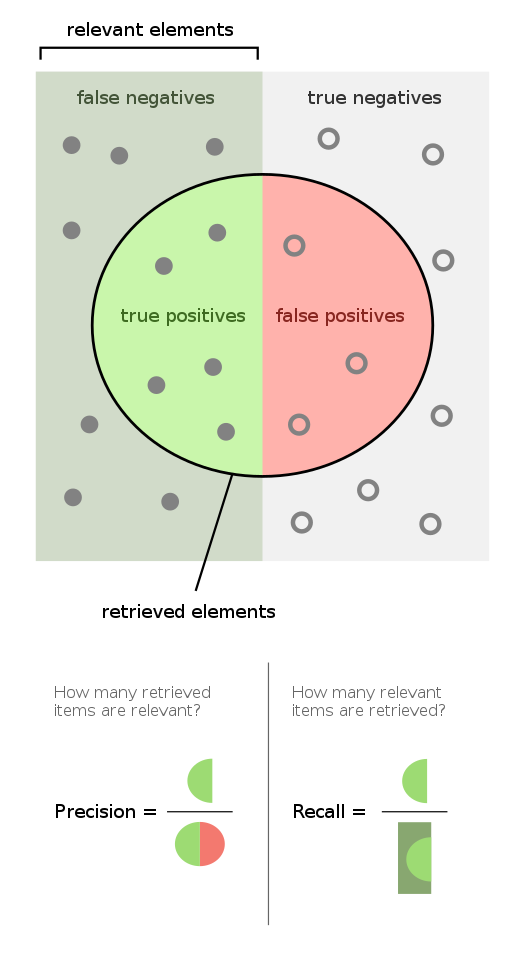

### Matching mode

A True Positive (TP) result is obtained when the predicted entity matches the ground truth entity. There are two types of "match":
- **Exact** boundary matching：predicted entity boundaries is exaclty the same as the true entity boudaries.
- **Partial** boundary matching：predicted entity boundaries overlap the true entity boudaries.

## Sub-task 6
Implement a function that returns `True` when two entities are matching and `False` otherwise. Taking into account the matching mode (`exact` or `partial`)


In [ ]:
from typing import List
from spacy.tokens import Doc, Span
from spacy import Language


def is_match(true_ent: Span, pred_ent: Span, matching_mode: str = "exact") -> bool:
    """Returns True if the predicted entity matches the ground truth entity.
    If matching_mode = "exact": The function returns True when the entity boundaries are exactly the same.
    If matching_mode = "partial" The function returns True when the entity boundaries are overlaping.
    """
    start_char_true, end_char_true = (true_ent.start_char, true_ent.end_char)
    start_char_pred, end_char_pred = (pred_ent.start_char, pred_ent.end_char)
    if matching_mode == "exact":
        ## YOUR CODE HERE (1-4 lines)

        ## END YOUR CODE
    elif matching_mode == "partial":
        ## YOUR CODE HERE (1-4 lines)

        ## END YOUR CODE

    else:
        raise ValueError(
            f"Expecting matching_mode to be 'exact' or 'partial' and not {matching_mode}"
        )

### Metrics

### 1. Precision:
Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances. Written as a formula:

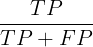

### 2. Recall:
Recall, or sensitivity, gauges the model’s ability to identify all relevant positive entities. It is the fraction of relevant instances that were retrieved. Written as a formula:

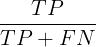

### 3. F1 Score:
The F1 score is the harmonic mean of precision and recall:

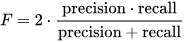

## Sub-task 7
Implement a function that compare documents by documents two list of Spacy Doc and returns a dictionary with:
   - The number of True Positive (TP): predicted entities matching true entities.
   - The number of False Positive (FP): predicted entities not matching any true entities.
   - The number of False Negative (FN): true entities not matching any predicted entities.
   - The Precision (precision): the fraction of relevant instances among the retrieved instances.
   - The Recall (recall): the fraction of relevant instances that were retrieved.
   - The F1-score (f1): the harmonic mean of precision and recall.

In [ ]:
from typing import List, Dict
from spacy.tokens import Doc


def evaluate(
    true_docs: List[Doc], pred_docs: List[Doc], matching_mode: str = "exact"
) -> Dict:
    """Compare documents by documents two list of Spacy Doc and returns a dictionary with:
    - The number of True Positive (TP): predicted entities matching true entities.
    - The number of False Positive (FP): predicted entities not matching any true entities.
    - The number of False Negative (FN): true entities not matching any predicted entities.
    - The Precision (precision): the fraction of relevant instances among the retrieved instances.
    - The Recall (recall): the fraction of relevant instances that were retrieved.
    - The F1-score (f1): the harmonic mean of precision and recall.
    """
    scores = {"TP": 0, "FP": 0, "FN": 0}
    for true_doc, pred_doc in zip(true_docs, pred_docs):
        ## YOUR CODE HERE (~15 lines)
        # Compute TP, FP and FN for each doc
        
        ## END YOUR CODE

    ## YOUR CODE HERE
    # Compute Precision, Recall, F1

    # Precision (~1-4 lines)


    # Recall (~1-4 lines)


    # F1 (~1-4 lines)

    ## END YOUR CODE
    return scores

### Sanity check

The `evaluate(test_docs, test_docs)` function should retrun `{'TP': 308, 'FP': 0, 'FN': 0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}`

In [ ]:
evaluate(true_docs=true_docs, pred_docs=true_docs, matching_mode="exact")

In [ ]:
scores = evaluate(true_docs=true_docs, pred_docs=pred_docs, matching_mode="exact")
print(scores)

### **Issue**: The recall is low which means that many entities are not detected.

This is the limitation of rule-based methods.



In [ ]:
displacy.render(pred_docs[0], style="ent")

### **Solution**: Training a supervised machine learning model.

# iv. NER with Machine Learning (Transformer)

In [ ]:
from IPython.display import Image

Image("/kaggle/input/ner-with-bert/BERT_NER.jpg")

Transformers are used for Named Entity Recognition (NER) due to the following reasons:

- **Contextual information**: Transformers are capable of capturing the context and relationships between words in a sentence, which is essential for accurate NER. By considering the context, transformers can disambiguate words that have multiple meanings and identify named entities more accurately.
- **Pre-training**: Transformers are pre-trained on large corpus of text data, which provides them with a vast knowledge of the language and the ability to generate high-quality token representations that can be fine-tuned for specific NER tasks.
- **Transfer learning**: Transformers can be fine-tuned for NER using a small annotated dataset, which reduces the amount of labeled data required to train NER models and makes it possible to adapt to new domains and languages easily.
- **High accuracy**: Transformers have shown to achieve state-of-the-art performance on various NER benchmarks and have been widely adopted in many NLP applications.

In summary, transformers provide a powerful and flexible framework for NER, making it possible to extract structured information from unstructured text data effectively and efficiently.

## BERT: The Transformer model used for NER

[BERT](https://arxiv.org/abs/1810.04805) is an "encoder-only" transformer architecture.

### **Further Reading & Learning Resources**

If you’d like to dive deeper into the Transformer architecture, the following resources are excellent starting points:

* **[The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)**
  A highly intuitive and visual blog post that explains the core ideas behind Transformers step by step. Ideal for building intuition before diving into equations.

* **[Attention Is All You Need](https://arxiv.org/abs/1706.03762)**
  The original research paper introducing the Transformer model. While mathematically dense, it provides a complete and precise description of the architecture.

* **[3Blue1Brown – Neural Networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)**
  An outstanding video series that develops deep intuition for neural networks, from basic multilayer perceptrons to the ideas underlying modern large language models.

* **[Transformer (Google AI Blog)](https://blog.research.google/2017/08/transformer-novel-neural-network.html)**
  A concise and accessible overview from the original authors, explaining the motivation behind the Transformer and its key innovations.

### **A quick summary**

The BERT model is a stack of encoders (there’s nothing magical about the number six, one can definitely experiment with other arrangements).

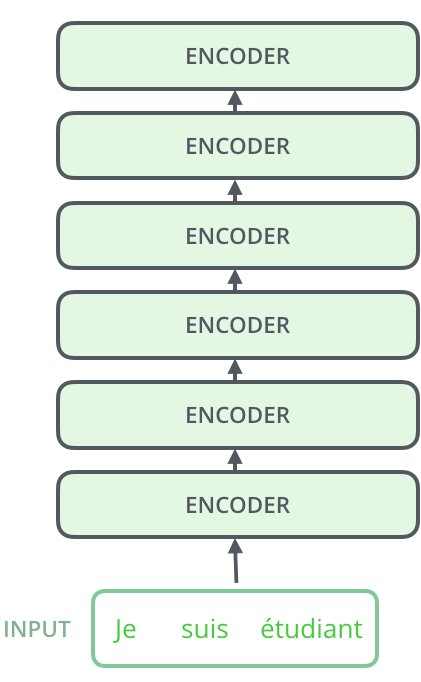

### **Encoder block**

The encoders are all identical in structure (yet they do not share weights). Each one is broken down into blocks:

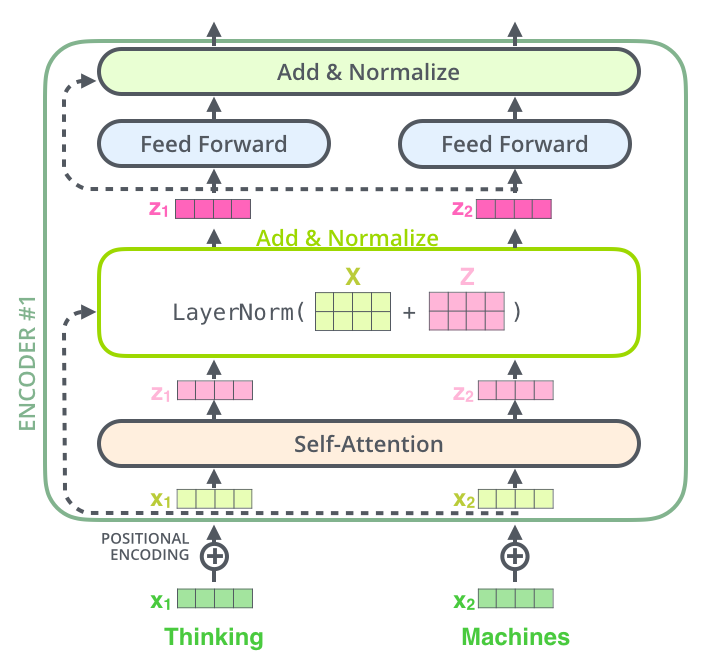

### **Input**

We begin by turning each input word into a vector using an embedding algorithm. The transformer adds a positional encoding vector to each input embedding. These vectors follow a specific pattern that the model learns, which helps it determine the position of each word, or the distance between different words in the sequence.

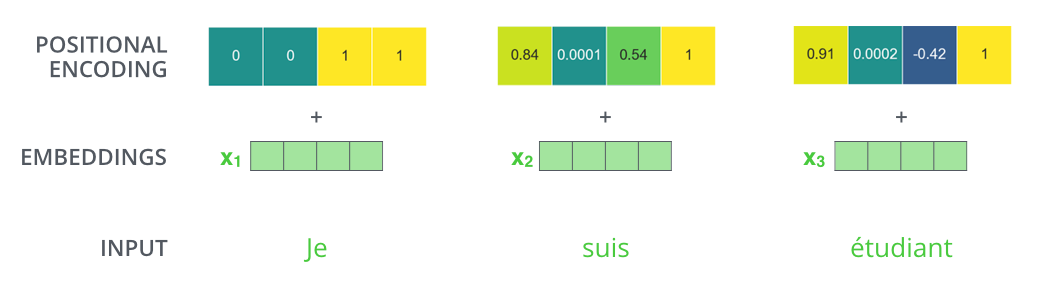

### **Self-attention layer**

The most important part of the model is the self-attention layer – a layer that helps the encoder look at other words in the input sentence as it encodes a specific word. Say the following sentence is an input sentence we want to translate:

”The animal didn't cross the street because it was too tired”

What does “it” in this sentence refer to? Is it referring to the street or to the animal? It’s a simple question to a human, but not as simple to an algorithm. When the model is processing the word “it”, self-attention allocate more weight to “animal”.


## Zoom in into real BERT model (Hugging Face)

[Hugging Face](https://huggingface.co/models) is a platfrom that allows users to share machine learning models. Moreover, Hugging Face is most notable for its [transformers library](https://huggingface.co/docs/transformers/en/index) that provides APIs and tools to easily download and train state-of-the-art pretrained models.

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("prajjwal1/bert-tiny")
model = AutoModel.from_pretrained("prajjwal1/bert-tiny")

In [ ]:
tokenizer.tokenize(text)

In [ ]:
model

### How many trainable parameters for BERT tiny ?

In [ ]:
# Embedding Layer
embed_params = 30522 * 128
position_params = 512 * 128
sequence_params = 2 * 128
layer_norm_input = 2 * 128
embedding_params = embed_params + position_params + sequence_params + layer_norm_input

# Self attention Layer
query_matrix = 128 * 128 + 128
key_matrix = 128 * 128 + 128
value_matrix = 128 * 128 + 128
linear_attention = 128 * 128 + 128
layer_norm_attention = 2 * 128
attention_params = (
    query_matrix + key_matrix + value_matrix + linear_attention + layer_norm_attention
)

# Feed Forward Layer
liner_ffd_1 = 128 * 512 + 512
liner_ffd_2 = 512 * 128 + 128
layer_norm_ffd = 2 * 128
feed_forward_params = liner_ffd_1 + liner_ffd_2 + layer_norm_ffd

# Bert Layer
bert_layer = attention_params + feed_forward_params

# Pooler Layer
pooler_params = 128 * 128 + 128

bert_params = embedding_params + 2 * bert_layer + pooler_params
print(bert_params)

In [ ]:
model.num_parameters()

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = AutoModel.from_pretrained("google-bert/bert-base-uncased")

In [ ]:
model

## Sub-task 8
Calculate layer by layer how many trainable variables are in the **BERT-base** model.

In [ ]:
## YOUR CODE HERE

# Embedding Layer
embed_params =
position_params =
sequence_params =
layer_norm_input =
embedding_params = embed_params + position_params + sequence_params + layer_norm_input

# Self attention Layer
query_matrix =
key_matrix =
value_matrix = 
linear_attention = 
layer_norm_attention = 
attention_params = (
    query_matrix + key_matrix + value_matrix + linear_attention + layer_norm_attention
)

# Feed Forward Layer
liner_ffd_1 = 
liner_ffd_2 = 
layer_norm_ffd = 
feed_forward_params = liner_ffd_1 + liner_ffd_2 + layer_norm_ffd

# Bert Layer
bert_layer = attention_params + feed_forward_params
num_bert_layer =

# Pooler Layer
pooler_params = 

bert_params = embedding_params + num_bert_layer * bert_layer + pooler_params

## END YOUR CODE
print(bert_params)

In [ ]:
model.num_parameters()

## Step-by-step walkthrough

Training a supervised deep-learning model consists in feeding batches of annotated samples taken from a training corpus to a model and optimizing its parameters of the model to decrease its prediction error. The process of training a pipeline with [EDS-NLP](https://aphp.github.io/edsnlp/v0.10.5/) is structured as follows:

## Defining the model
We first start by seeding the random states and instantiating a new trainable pipeline. The model described here computes text embeddings with a pre-trained BERT transformer and performs the NER prediction task using a linear layer and a softmax. To compose deep-learning modules, we nest them in a dictionary : each new dictionary will instantiate a new module, and the @factory key will be used to select the class of the module.

In [ ]:
import edsnlp
from confit.utils.random import set_seed

set_seed(42)

nlp = edsnlp.blank("eds")
nlp.add_pipe(
    "eds.ner_crf",  # We use the eds.ner_crf NER task module, which classifies word embeddings into NER labels (BIOUL scheme).
    name="ner",
    config={
        "mode": "independent",  # Linear + softmax (remove CRF)
        "window": 1,  # Linear + softmax (remove CRF)
        "embedding": {
            "@factory": "eds.transformer",  # Embedding
            "model": "prajjwal1/bert-tiny",  # TinyBERT
        },
    },
)

## Adapting a dataset

To train a pipeline, we must convert our annotated data into documents that will be either used as training samples or a evaluation samples. This is done by designing a function to convert the dataset into a list of spaCy Doc objects.

At this step, we might also want to perform **data augmentation**, **filtering**, **splitting** or any other **data transformation**. For example, as the Transformer cannot handle too much text in one sample, large documents need to be splitted into pieces.However, in our case, the MEDLINE documents are small, so we do not need to split the documents.

## Sub-task 9
Implement the NER adapter:
- Convert the BRAT data folder to a list of Spacy doc, with the [edsnlp.data.read_standoff()](https://aphp.github.io/edsnlp/latest/data/standoff/#edsnlp.data.standoff.read_standoff) function. 
- Use  the [span_setter](https://aphp.github.io/edsnlp/latest/reference/edsnlp/utils/span_getters/#edsnlp.utils.span_getters.SpanSetterArg) argument in order to keep only the `CHEM` labelled entities.
- Use the `ents` attribute of each `Doc` to check if it contains any annotations. If it is empty don't yield the doc.

In [ ]:
import edsnlp


def ner_adapter(
    path: str,
    skip_empty: bool = True,  # skip documents that do not contain any annotations.
):
    """Take path to Brat data foler and yield spacy Doc with only the CHEM labeled entities
    If skip_empty is True, it also skip the doc without CHEM labeled entities
    """
    docs = edsnlp.data.read_standoff(
        path,
        span_setter={"ents": "CHEM"},
        # Tokenize the training docs with the same tokenizer as the trained model
        tokenizer=nlp.tokenizer,
    )
    for doc in docs:
        ## YOUR CODE HERE
        # Skip the doc without annotations ("continue")
        
        ## END CODE HERE
        yield doc

## Loading the data

We then load and adapt (i.e., convert into spaCy Doc objects) the training and validation dataset. Since the adaption of raw documents depends on tokenization used in the trained model, we need to pass the model to the adapter function.

In [ ]:
train_data_path = "/kaggle/input/quaero/QUAERO_FrenchMed/corpus/train/MEDLINE"
val_data_path = "/kaggle/input/quaero/QUAERO_FrenchMed/corpus/dev/MEDLINE"

train_docs = list(ner_adapter(path=train_data_path, skip_empty=True))
val_docs = list(ner_adapter(path=val_data_path, skip_empty=True))

## Complete the initialization with the training data
We initialize the missing or incomplete components attributes (such as label vocabularies) with the training dataset

In [ ]:
nlp.post_init(train_docs)

## Preprocessing the data

The training dataset is then preprocessed into features. The resulting preprocessed dataset is then wrapped into a pytorch DataLoader to be fed to the model during the training loop with the model's own collate method.

In [ ]:
import torch

batch_size = 16

# This will call the preprocess_supervised method of the TorchComponent class on every document
# it returns a list of dictionaries containing the features and labels of each document.
preprocessed = list(
    nlp.preprocess_many(  #
        train_docs,
        supervision=True,
    )
)
dataloader = torch.utils.data.DataLoader(
    preprocessed,
    batch_size=batch_size,
    collate_fn=nlp.collate,
    shuffle=True,
)

## Looping through the training data
We instantiate an optimizer and start the training loop. Inside the training loop, the trainable components are fed the collated batches from the dataloader by calling the `TorchComponent.module_forward` methods to compute the losses.

In [ ]:
from itertools import chain, repeat
from tqdm import tqdm

lr = 1e-5
n_steps = len(dataloader) * 5  # 5 Epochs
optimizer = torch.optim.AdamW(
    params=nlp.parameters(),
    lr=lr,
)

# We will loop over the dataloader
iterator = chain.from_iterable(repeat(dataloader))
for step in tqdm(range(n_steps), "Training model", leave=True):
    batch = next(iterator)
    optimizer.zero_grad()
    with nlp.cache():
        loss = torch.zeros((), device="cpu")
        for name, component in nlp.torch_components():
            output = component.module_forward(batch[name])  # forward the model
            if "loss" in output:
                loss += output["loss"]
    loss.backward()

    optimizer.step()

## Evaluating the model
Finally, the model is evaluated on the test dataset.

In [ ]:
pred_docs = process_docs(nlp=nlp, docs=val_docs)
scores = evaluate(true_docs=val_docs, pred_docs=pred_docs, matching_mode="exact")
print(scores)

In [ ]:
displacy.render(val_docs[0], style="ent")

In [ ]:
displacy.render(pred_docs[0], style="ent")

# v. Model's hyperparameters optimization

## Batch Size

Batch size is one of the most important hyperparameters in deep learning training, and it represents the number of samples used in one forward and backward pass through the network and has a direct impact on the accuracy and computational efficiency of the training process. The batch size can be understood as a trade-off between accuracy and speed. Large batch sizes can lead to faster training times but may result in lower accuracy and overfitting, while smaller batch sizes can provide better accuracy, but can be computationally expensive and time-consuming.

The batch size can also affect the convergence of the model, meaning that it can influence the optimization process and the speed at which the model learns. Small batch sizes can be more susceptible to random fluctuations in the training data, while larger batch sizes are more resistant to these fluctuations but may converge more slowly.

It is important to note that there is no one-size-fits-all answer when it comes to choosing a batch size, as the ideal size will depend on several factors, including the size of the training dataset, the complexity of the model, and the computational resources available.

### Monitoring the loss

To know how the model is training, it is important to monitor the **Training loss**.

## Sub-task 10
Store the loss at each step in order to plot the training loss curve.
*Task*: You will have to convert the loss which is a [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) into a `float`.

In [ ]:
from torch import Tensor


def store_train_loss(train_losses: list, loss: Tensor) -> None:
    ## YOUR CODE HERE (1 line)
    
    ## END CODE HERE

In [ ]:
import edsnlp
import torch
from confit.utils.random import set_seed
from itertools import chain, repeat
from tqdm import tqdm


def train_NER_bert(batch_size: int):

    # 1. Defining the model
    set_seed(42)
    nlp = edsnlp.blank("eds")
    nlp.add_pipe(
        "eds.ner_crf",  # We use the eds.ner_crf NER task module, which classifies word embeddings into NER labels (BIOUL scheme).
        name="ner",
        config={
            "mode": "independent",  # Linear + softmax (remove CRF)
            "window": 1,  # Linear + softmax (remove CRF)
            "embedding": {
                "@factory": "eds.transformer",  # Embedding
                "model": "prajjwal1/bert-tiny",  # BERT model
            },
        },
    )

    # 2. Complete the initialization with the training data
    nlp.post_init(train_docs)

    # 3. Preprocessing the data
    preprocessed = list(
        nlp.preprocess_many(  #
            train_docs,
            supervision=True,
        )
    )
    dataloader = torch.utils.data.DataLoader(
        preprocessed,
        batch_size=batch_size,
        collate_fn=nlp.collate,
        shuffle=True,
    )

    # 4. Training loop
    lr = 1e-4
    n_steps = len(dataloader) * 5  # 5 Epochs
    train_losses = []
    optimizer = torch.optim.AdamW(
        params=nlp.parameters(),
        lr=lr,
    )

    # We will loop over the dataloader
    iterator = chain.from_iterable(repeat(dataloader))
    for step in tqdm(range(n_steps), "Training model", leave=True):
        batch = next(iterator)
        optimizer.zero_grad()
        with nlp.cache():
            loss = torch.zeros((), device="cpu")
            for name, component in nlp.torch_components():
                output = component.module_forward(batch[name])
                if "loss" in output:
                    loss += output["loss"]

        loss.backward()

        optimizer.step()

        store_train_loss(
            train_losses=train_losses, loss=loss
        )  # Store the training loss every step

    return nlp, train_losses

## Sub-task 11
Define a function that plots the Training loss using `matplotlib` module.

In [ ]:
from typing import List
from matplotlib import pyplot as plt


def plot_training_loss(train_losses: List[float], title: str) -> None:
    """Display training loss with a title"""
    ## YOUR CODE HERE (~ 3 lines)

    ## END CODE HERE
    plt.title(title)
    plt.show()

For **batch size = 1, 2, 4, 8, 16, 32**:
- Print the training duration using `time` module.
- Print the metrics (TP, FP, FN, Precision, Recall, F1-score) on the validation dataset using `process_docs` and `evaluate()`.
- Plot the Training loss using `matplotlib` module.

In [ ]:
import datetime
from matplotlib import pyplot as plt
import time

for batch_size in [1, 2, 4, 8, 16, 32]:
    print(f"######## BATCH SIZE = {batch_size} #######")

    tic = time.time()  # Start timer
    print("Training...")
    nlp, train_losses = train_NER_bert(batch_size=batch_size)  # Training NER
    tac = time.time()  # End timer

    # Measure training time
    print("Elapsed time = {}".format(str(datetime.timedelta(seconds=int(tac - tic)))))

    # Evalutation on validation dataset
    pred_docs = process_docs(nlp=nlp, docs=val_docs)
    print(evaluate(true_docs=val_docs, pred_docs=pred_docs, matching_mode="exact"))

    # Plot training loss
    plot_training_loss(
        train_losses=train_losses,
        title="Training loss for batch size = {}".format(batch_size),
    )

### Why Do Large Batch Sizes Lead To Poorer Generalization?

Gradient with small batch size oscillates much more compared to larger batch size. This oscillation can be considered noise. However, for a non-convex loss landscape(which is often the case), this noise helps come out of the local minima.  Thus larger batches do fewer and coarser search steps for the optimal solution, and so by construction, will be less likely to converge on the optimal solution.

## Epochs

An epoch is a full training cycle through all of the samples in the training dataset. The number of epochs determines how many times the model will see the entire training data before completing training.

The number of epochs is an important hyperparameter to set correctly, as it can affect both the accuracy and computational efficiency of the training process. If the number of epochs is too small, the model may not learn the underlying patterns in the data, resulting in underfitting. On the other hand, if the number of epochs is too large, the model may overfit the training data, leading to poor generalization performance on new, unseen data.

The ideal number of epochs for a given training process can be determined through experimentation, and monitoring the performance of the model on a validation set. Once the model stops improving on the validation set, it is a good indication that the number of epochs has been reached.

### Monitoring the metrics

To know if the model is underfitting or overfitting, it is important to monitor the validation metrics:
- Validation Precision, Recall, F1

## Sub-task 12 
Store the evaluation metrics (TP, FP, FN, Precision, Recall, F1) on the validation dataset and training dataset.

In [ ]:
from typing import List
from spacy import Language
from spacy.tokens import Doc


def store_evaluation_metrics(
    train_scores: List[dict],
    train_docs: List[Doc],
    val_scores: List[dict],
    val_docs: List[Doc],
    nlp: Language,
    step: int,
) -> None:
    """Append a dictionnary of metrics (TP, FP, FN, Precision, Recall, F1) for:
    - Train documents
    - Validation documents
    """
    # Train Precicions/Recall/F1
    ## YOUR CODE HERE
    # Evaluate Training

    ## END CODE HERE
    train_score["Step"] = step
    train_score["Dataset"] = "Train"
    train_scores.append(train_score)

    # Val Precicions/Recall/F1
    ## YOUR CODE HERE
    # Evaluate Validation

    ## END CODE HERE
    val_score["Step"] = step
    val_score["Dataset"] = "Validation"
    val_scores.append(val_score)

    print(val_score)

In [ ]:
import edsnlp
import torch
from confit.utils.random import set_seed
from itertools import chain, repeat
from tqdm import tqdm


def train_NER_bert(batch_size: int, n_epochs: int):
    # 1. Defining the model
    set_seed(42)
    nlp = edsnlp.blank("eds")
    nlp.add_pipe(
        "eds.ner_crf",  # We use the eds.ner_crf NER task module, which classifies word embeddings into NER labels (BIOUL scheme).
        name="ner",
        config={
            "mode": "independent",  # Linear + softmax (remove CRF)
            "window": 1,  # Linear + softmax (remove CRF)
            "embedding": {
                "@factory": "eds.transformer",  # Embedding
                "model": "prajjwal1/bert-tiny",  # BERT model
            },
        },
    )

    # 2. Complete the initialization with the training data
    nlp.post_init(train_docs)

    # 3. Preprocessing the data
    preprocessed = list(
        nlp.preprocess_many(
            train_docs,
            supervision=True,
        )
    )
    dataloader = torch.utils.data.DataLoader(
        preprocessed,
        batch_size=batch_size,
        collate_fn=nlp.collate,
        shuffle=True,
    )

    # 4. Training loop
    lr = 1e-4
    n_steps = len(dataloader) * n_epochs  # Epochs
    train_losses = []
    train_scores = []
    val_scores = []
    optimizer = torch.optim.AdamW(
        params=nlp.parameters(),
        lr=lr,
    )

    # We will loop over the dataloader
    iterator = chain.from_iterable(repeat(dataloader))
    for step in tqdm(range(n_steps), "Training model", leave=True):
        batch = next(iterator)
        optimizer.zero_grad()
        with nlp.cache():
            loss = torch.zeros((), device="cpu")
            for name, component in nlp.torch_components():
                output = component.module_forward(batch[name])  #
                if "loss" in output:
                    loss += output["loss"]

        loss.backward()

        optimizer.step()

        store_train_loss(train_losses=train_losses, loss=loss)

        ## Storing metrics on Validation Dataset and Training dataset
        if (step % 100) == 0 or step == (n_steps - 1):
            store_evaluation_metrics(
                train_scores=train_scores,
                train_docs=train_docs,
                val_scores=val_scores,
                val_docs=val_docs,
                nlp=nlp,
                step=step,
            )

    return nlp, train_losses, train_scores, val_scores

## Sub-task 13
Define a function that plots the Validation F1-score against the Training F1-socre using `matplotlib` module.

In [ ]:
from typing import List, Dict
import pandas as pd
from matplotlib import pyplot as plt


def plot_val_train_metrics(train_scores: List[Dict], val_scores: List[Dict]) -> None:
    """Display Validation F1-score against the Training F1-socre"""
    ## YOUR CODE HERE (~ 5 lines)

    ## END CODE HERE
    plt.show()

For **n_epochs = 20**, **batch_size = best_batch_size** and **lr = 1e-4**:
- Print the training duration using `time` module.
- Print the metrics (TP, FP, FN, Precision, Recall, F1-score) on the validation dataset using `process_docs` and `evaluate()`.
- Plot the Training loss using `matplotlib` module.
- Plot the Validation F1-score against the Training F1-socre using `matplotlib` module.

In [ ]:
import datetime
from matplotlib import pyplot as plt
import pandas as pd
import time

batch_size = 2
n_epochs = 20

tic = time.time()  # Start timer
print("Training...")
nlp, train_losses, train_scores, val_scores = train_NER_bert(
    batch_size=batch_size, n_epochs=n_epochs
)  # Training NER
tac = time.time()  # End timer

# Measure training time
print("Elapsed time = {}".format(str(datetime.timedelta(seconds=int(tac - tic)))))

# Evalutation on validation dataset
pred_docs = process_docs(nlp=nlp, docs=val_docs)
print(evaluate(true_docs=val_docs, pred_docs=pred_docs, matching_mode="exact"))

# Plot training loss
plot_training_loss(
    train_losses=train_losses,
    title="Training loss for batch size = {}".format(batch_size),
)

# Plot Validation F1-score against Training F1-score
plot_val_train_metrics(train_scores=train_scores, val_scores=val_scores)

## Learning rate

The learning rate controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

### **Issue**: Correlation between the hyperparameters

Hyperparameters have an influence on each other. For instace decreasing the learning rate may improve the model with a larger number of epochs or smaller batch size.

### Introducing Optuna

[Optuna](https://optuna.org/) is an automatic hyperparameter optimization software framework, particularly designed for machine learning.

In [ ]:
import edsnlp
import torch
from confit.utils.random import set_seed
from itertools import chain, repeat
from tqdm import tqdm


def train_NER_bert(batch_size: int, n_epochs: int, lr: float):
    # 1. Defining the model
    set_seed(42)
    nlp = edsnlp.blank("eds")
    nlp.add_pipe(
        "eds.ner_crf",  # We use the eds.ner_crf NER task module, which classifies word embeddings into NER labels (BIOUL scheme).
        name="ner",
        config={
            "mode": "independent",  # Linear + softmax (remove CRF)
            "window": 1,  # Linear + softmax (remove CRF)
            "embedding": {
                "@factory": "eds.transformer",  # Embedding
                "model": "prajjwal1/bert-tiny",  # BERT model
            },
        },
    )

    # 2. Complete the initialization with the training data
    nlp.post_init(train_docs)

    # 3. Preprocessing the data
    preprocessed = list(
        nlp.preprocess_many(  #
            train_docs,
            supervision=True,
        )
    )
    dataloader = torch.utils.data.DataLoader(
        preprocessed,
        batch_size=batch_size,
        collate_fn=nlp.collate,
        shuffle=True,
    )

    # 4. Training loop
    n_steps = len(dataloader) * n_epochs  # Epochs
    optimizer = torch.optim.AdamW(
        params=nlp.parameters(),
        lr=lr,
    )

    # We will loop over the dataloader
    iterator = chain.from_iterable(repeat(dataloader))
    for step in tqdm(range(n_steps), "Training model", leave=True):
        batch = next(iterator)
        optimizer.zero_grad()
        with nlp.cache():
            loss = torch.zeros((), device="cpu")
            for name, component in nlp.torch_components():
                output = component.module_forward(batch[name])  #
                if "loss" in output:
                    loss += output["loss"]

        loss.backward()

        optimizer.step()

    return nlp

In [ ]:
import optuna


def objective(trial):
    batch_size = trial.suggest_categorical("batch_size", [2, 4, 8])
    n_epochs = trial.suggest_int("n_epochs", 3, 8)
    lr = trial.suggest_float("learning_rate", 1e-4, 1e-3, log=True)
    nlp = train_NER_bert(batch_size=batch_size, n_epochs=n_epochs, lr=lr)
    pred_val_docs = process_docs(nlp=nlp, docs=val_docs)
    val_score = evaluate(
        true_docs=val_docs, pred_docs=pred_val_docs, matching_mode="exact"
    )
    return val_score["f1"]

## Sub-task 14 (OPTIONAL) 
Using [Optuna](https://optuna.org/), find the optimal combination of `batch_size`, `n_epochs` and `learning_rate` maximizing the `F1-score` on the Validation dataset.

**WARNING**: the cell below takes a long time to run.

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

In [ ]:
study.best_params

### Choose the best combination

For **n_epochs = best_n_epochs**, **batch_size = best_batch_size** and **lr = best_lr**:
- Print the training duration using `time` module.
- Print the metrics (TP, FP, FN, Precision, Recall, F1-score) on the validation dataset using `process_docs` and `evaluate()`.
- Plot the Training loss using `matplotlib` module.
- Plot the Validation F1-score against the Training F1-socre using `matplotlib` module.

In [ ]:
import edsnlp
import torch
from confit.utils.random import set_seed
from itertools import chain, repeat
from tqdm import tqdm


def train_NER_bert(batch_size: int, n_epochs: int, lr: float):
    # 1. Defining the model
    set_seed(42)
    nlp = edsnlp.blank("eds")
    nlp.add_pipe(
        "eds.ner_crf",  # We use the eds.ner_crf NER task module, which classifies word embeddings into NER labels (BIOUL scheme).
        name="ner",
        config={
            "mode": "independent",  # Linear + softmax (remove CRF)
            "window": 1,  # Linear + softmax (remove CRF)
            "embedding": {
                "@factory": "eds.transformer",  # Embedding
                "model": "prajjwal1/bert-tiny",  # BERT model
            },
        },
    )

    # 2. Complete the initialization with the training data
    nlp.post_init(train_docs)

    # 3. Preprocessing the data
    preprocessed = list(
        nlp.preprocess_many(  #
            train_docs,
            supervision=True,
        )
    )
    dataloader = torch.utils.data.DataLoader(
        preprocessed,
        batch_size=batch_size,
        collate_fn=nlp.collate,
        shuffle=True,
    )

    # 4. Training loop
    n_steps = len(dataloader) * n_epochs  # Epochs
    train_losses = []
    train_scores = []
    val_scores = []
    optimizer = torch.optim.AdamW(
        params=nlp.parameters(),
        lr=lr,
    )

    # We will loop over the dataloader
    iterator = chain.from_iterable(repeat(dataloader))
    for step in tqdm(range(n_steps), "Training model", leave=True):
        batch = next(iterator)
        optimizer.zero_grad()
        with nlp.cache():
            loss = torch.zeros((), device="cpu")
            for name, component in nlp.torch_components():
                output = component.module_forward(batch[name])  #
                if "loss" in output:
                    loss += output["loss"]

        loss.backward()

        optimizer.step()

        store_train_loss(train_losses=train_losses, loss=loss)

        ## Storing metrics on Validation Dataset and Training dataset
        if (step % 100) == 0 or step == (n_steps - 1):
            store_evaluation_metrics(
                train_scores=train_scores,
                train_docs=train_docs,
                val_scores=val_scores,
                val_docs=val_docs,
                nlp=nlp,
                step=step,
            )

    return nlp, train_losses, train_scores, val_scores

## Sub-task 15
Complete the cell below with a good set of hyperparameters
Proposed hyperparameters: 
- n_epochs = best_n_eopchs
- batch_size = best_batch_size
- lr = best_lr

Feel free to use other values if you found better results

In [ ]:
import datetime
from matplotlib import pyplot as plt
import pandas as pd
import time

## YOUR CODE HERE
batch_size = 
n_epochs = 
lr = 
## END YOUR CODE

embedding_model = "prajjwal1/bert-tiny"

tic = time.time()  # Start timer
print("Training...")
nlp, train_losses, train_scores, val_scores = train_NER_bert(
    batch_size=batch_size, n_epochs=n_epochs, lr=lr
)  # Training NER
tac = time.time()  # End timer

# Measure training time
print("Elapsed time = {}".format(str(datetime.timedelta(seconds=int(tac - tic)))))

# Evalutation on validation dataset
pred_docs = process_docs(nlp=nlp, docs=val_docs)
print(evaluate(true_docs=val_docs, pred_docs=pred_docs, matching_mode="exact"))

# Plot training loss
plot_training_loss(
    train_losses=train_losses,
    title="batch size = {}, lr = {}, embedding model = {}".format(
        batch_size, lr, embedding_model
    ),
)

# Plot Validation F1-score against Training F1-score
plot_val_train_metrics(train_scores=train_scores, val_scores=val_scores)

nlp.to_disk("model_ML_BERT_tiny")

 ## Other hyperparamerters

Many other hyperparamerters could be fine tuned such as:
- The AdamW optimizer parameters
    - betas
    - weigh_decay
- Using another optimizer (SGD, Adam... etc.)
- Model's architecture:
    - Number of layers
    - Adding CNN
    - Adding CRF
    
However, thoese experimentations are time consuming and may only slighly improve the model.

## Embedding: pre-trained BERT models (Transfer learning)

The weights of the initial embedding process are very important for the downstream task.
Here, we are using [BERT-Tiny](https://huggingface.co/prajjwal1/bert-tiny) which is one of the smallest pre-trained BERT variants. I has been trained mainly on English text.

What about using:
- a larger BERT
- a larger BERT trained on French text
- a larger BERT trained on French biomedical text

In [ ]:
import edsnlp
import torch
from confit.utils.random import set_seed
from itertools import chain, repeat
from tqdm import tqdm
from accelerate import Accelerator


def train_NER_bert(
    batch_size: int,
    n_epochs: int,
    lr: float,
    embedding_model: str,
):
    # 1. Defining the model
    set_seed(42)
    nlp = edsnlp.blank("eds")

    mode = "independent"  # Linear + softmax (remove CRF)
    window = 1  # Linear + softmax (remove CRF)
    embedding = {
        "@factory": "eds.transformer",  # Embedding
        "model": embedding_model,  # BERT model
    }
    nlp.add_pipe(
        "eds.ner_crf",  # We use the eds.ner_crf NER task module, which classifies word embeddings into NER labels (BIOUL scheme).
        name="ner",
        config={
            "mode": mode,
            "window": window,
            "embedding": embedding,
        },
    )

    # 2. Complete the initialization with the training data
    nlp.post_init(train_docs)

    # 3. Preprocessing the data
    preprocessed = list(
        nlp.preprocess_many(  #
            train_docs,
            supervision=True,
        )
    )
    dataloader = torch.utils.data.DataLoader(
        preprocessed,
        batch_size=batch_size,
        collate_fn=nlp.collate,
        shuffle=True,
    )

    # 4. Training loop
    n_steps = len(dataloader) * n_epochs  # Epochs
    train_losses = []
    train_scores = []
    val_scores = []
    optimizer = torch.optim.AdamW(
        params=nlp.parameters(),
        lr=lr,
    )
    _, trained_pipes = zip(*nlp.torch_components())
    accelerator = Accelerator()
    print("Device:", accelerator.device)
    [dataloader, optimizer, *trained_pipes] = accelerator.prepare(
        dataloader,
        optimizer,
        *trained_pipes,
    )
    # We will loop over the dataloader
    iterator = chain.from_iterable(repeat(dataloader))
    for step in tqdm(range(n_steps), "Training model", leave=True):
        batch = next(iterator)
        optimizer.zero_grad()
        with nlp.cache():
            loss = torch.zeros((), device=accelerator.device)
            for name, pipe in nlp.torch_components():
                output = pipe.module_forward(batch[name])  #
                if "loss" in output:
                    loss += output["loss"]

        accelerator.backward(loss)
        optimizer.step()

        # Store the training loss every step
        store_train_loss(train_losses=train_losses, loss=loss)

        # Storing metrics on Validation Dataset and Training dataset
        if (step % 40) == 0 or step == (n_steps - 1):
            store_evaluation_metrics(
                train_scores=train_scores,
                train_docs=train_docs,
                val_scores=val_scores,
                val_docs=val_docs,
                nlp=nlp,
                step=step,
            )

    return nlp, train_losses, train_scores, val_scores

### A larger BERT

[BERT base model (uncased)](https://huggingface.co/google-bert/bert-base-uncased) is a transformers model pretrained on a large corpus of English data in a self-supervised fashion. This means it was pretrained on the raw texts only, with no humans labeling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts.

## Sub-task 16
For **n_epochs = 30**, **batch_size = 32**, **lr = 5e-5** and **embedding_model = "google-bert/bert-base-uncased"**:
- Print the training duration using `time` module.
- Print the metrics (TP, FP, FN, Precision, Recall, F1-score) on the validation dataset using `process_docs` and `evaluate()`.
- Plot the Training loss using `matplotlib` module.
- Plot the Validation F1-score against the Training F1-socre using `matplotlib` module.

In [ ]:
import datetime
from matplotlib import pyplot as plt
import pandas as pd
import time

## YOUR CODE HERE
batch_size = 
n_epochs = 
lr =
embedding_model = 
## END YOUR CODE


tic = time.time()  # Start timer
print("Training...")
nlp, train_losses, train_scores, val_scores = train_NER_bert(
    batch_size=batch_size, n_epochs=n_epochs, lr=lr, embedding_model=embedding_model
)  # Training NER
tac = time.time()  # End timer

# Measure training time
print("Elapsed time = {}".format(str(datetime.timedelta(seconds=int(tac - tic)))))

# Evalutation on validation dataset
pred_docs = process_docs(nlp=nlp, docs=val_docs)
print(evaluate(true_docs=val_docs, pred_docs=pred_docs, matching_mode="exact"))

# Plot training loss
plot_training_loss(
    train_losses=train_losses,
    title="batch size = {}, lr = {}, embedding model = {}".format(
        batch_size, lr, embedding_model
    ),
)

# Plot Validation F1-score against Training F1-score
plot_val_train_metrics(train_scores=train_scores, val_scores=val_scores)

nlp.to_disk("model_ML_bert_base")

### A larger BERT trained on French text

The [CamemBERT](https://arxiv.org/abs/1911.03894) model which is based on Facebook’s RoBERTa model released in 2019. It is a model trained on 138GB of French text. It is a state-of-the-art language model for French text.

## Sub-task 17
For **n_epochs = 30**, **batch_size = 32**, **lr = 5e-5** and **embedding_model = "almanach/camembert-base"**:
- Print the training duration using `time` module.
- Print the metrics (TP, FP, FN, Precision, Recall, F1-score) on the validation dataset using `process_docs` and `evaluate()`.
- Plot the Training loss using `matplotlib` module.
- Plot the Validation F1-score against the Training F1-socre using `matplotlib` module.

In [ ]:
import datetime
from matplotlib import pyplot as plt
import pandas as pd
import time

## YOUR CODE HERE
batch_size = 
n_epochs = 
lr = 
embedding_model = 
## END YOUR CODE


tic = time.time()  # Start timer
print("Training...")
nlp, train_losses, train_scores, val_scores = train_NER_bert(
    batch_size=batch_size, n_epochs=n_epochs, lr=lr, embedding_model=embedding_model
)  # Training NER
tac = time.time()  # End timer

# Measure training time
print("Elapsed time = {}".format(str(datetime.timedelta(seconds=int(tac - tic)))))

# Evalutation on validation dataset
pred_docs = process_docs(nlp=nlp, docs=val_docs)
print(evaluate(true_docs=val_docs, pred_docs=pred_docs, matching_mode="exact"))

# Plot training loss
plot_training_loss(
    train_losses=train_losses,
    title="batch size = {}, lr = {}, embedding model = {}".format(
        batch_size, lr, embedding_model
    ),
)

# Plot Validation F1-score against Training F1-score
plot_val_train_metrics(train_scores=train_scores, val_scores=val_scores)

nlp.to_disk("model_ML_camembert_base")

### A larger BERT trained on biomedical French text

[CamemBERT-bio](https://huggingface.co/almanach/camembert-bio-base) is a state-of-the-art french biomedical language model built using continual-pretraining from camembert-base.

## Sub-task 18
For **n_epochs = 30**, **batch_size = 32**, **lr = 5e-5** and **embedding_model = "almanach/camembert-bio-base"**:
- Print the training duration using `time` module.
- Print the metrics (TP, FP, FN, Precision, Recall, F1-score) on the validation dataset using `process_docs` and `evaluate()`.
- Plot the Training loss using `matplotlib` module.
- Plot the Validation F1-score against the Training F1-socre using `matplotlib` module.

In [ ]:
import datetime
from matplotlib import pyplot as plt
import pandas as pd
import time

## YOUR CODE HERE
batch_size = 32
n_epochs = 50
lr = 5e-5
embedding_model = "almanach/camembert-bio-base"
## END YOUR CODE


tic = time.time()  # Start timer
print("Training...")
nlp, train_losses, train_scores, val_scores = train_NER_bert(
    batch_size=batch_size, n_epochs=n_epochs, lr=lr, embedding_model=embedding_model
)  # Training NER
tac = time.time()  # End timer

# Measure training time
print("Elapsed time = {}".format(str(datetime.timedelta(seconds=int(tac - tic)))))

# Evalutation on validation dataset
pred_docs = process_docs(nlp=nlp, docs=val_docs)
print(evaluate(true_docs=val_docs, pred_docs=pred_docs, matching_mode="exact"))

# Plot training loss
plot_training_loss(
    train_losses=train_losses,
    title="batch size = {}, lr = {}, embedding model = {}".format(
        batch_size, lr, embedding_model
    ),
)

# Plot Validation F1-score against Training F1-score
plot_val_train_metrics(train_scores=train_scores, val_scores=val_scores)

nlp.to_disk("model_ML_camembert_bio")

## Model architecture: CNN and CRF

There are two elements, we can add to the models:
- Add a CNN between the BERT embedding and linear layer in order to give more flexibility to the model to adapt to the specific classification task
- Add CRF model at the end of the architecture which add more constraint on the BIOUL tagging scheme.

In [ ]:
import edsnlp
import torch
from confit.utils.random import set_seed
from itertools import chain, repeat
from tqdm import tqdm
from accelerate import Accelerator


def train_NER_bert(
    batch_size: int,
    n_epochs: int,
    lr: float,
    embedding_model: str,
    add_cnn: bool = False,
    add_crf: bool = False,
):
    # 1. Defining the model
    set_seed(42)
    nlp = edsnlp.blank("eds")

    # CRF
    if add_crf:
        mode = "joint"  # CRF
        window = 0  # Normal CRF
    else:
        mode = "independent"  # Linear + softmax (remove CRF)
        window = 1  # Linear + softmax (remove CRF)

    # Embedding
    bert_embedding = {
        "@factory": "eds.transformer",  # Embedding
        "model": embedding_model,  # BERT model
    }
    if add_cnn:
        embedding = {
            "@factory": "eds.text_cnn",  # CNN builds on top of the BERT word embeddings.
            "kernel_sizes": [3],
            "embedding": bert_embedding,
        }
    else:
        embedding = bert_embedding

    nlp.add_pipe(
        "eds.ner_crf",  # We use the eds.ner_crf NER task module, which classifies word embeddings into NER labels (BIOUL scheme).
        name="ner",
        config={
            "mode": mode,
            "window": window,
            "embedding": embedding,
        },
    )

    # 2. Complete the initialization with the training data
    nlp.post_init(train_docs)

    # 3. Preprocessing the data
    preprocessed = list(
        nlp.preprocess_many(  #
            train_docs,
            supervision=True,
        )
    )
    dataloader = torch.utils.data.DataLoader(
        preprocessed,
        batch_size=batch_size,
        collate_fn=nlp.collate,
        shuffle=True,
    )

    # 4. Training loop
    n_steps = len(dataloader) * n_epochs  # Epochs
    train_losses = []
    train_scores = []
    val_scores = []
    optimizer = torch.optim.AdamW(
        params=nlp.parameters(),
        lr=lr,
    )
    _, trained_pipes = zip(*nlp.torch_components())
    accelerator = Accelerator()
    print("Device:", accelerator.device)
    [dataloader, optimizer, *trained_pipes] = accelerator.prepare(
        dataloader,
        optimizer,
        *trained_pipes,
    )
    # We will loop over the dataloader
    iterator = chain.from_iterable(repeat(dataloader))
    for step in tqdm(range(n_steps), "Training model", leave=True):
        batch = next(iterator)
        optimizer.zero_grad()
        with nlp.cache():
            loss = torch.zeros((), device=accelerator.device)
            for name, pipe in nlp.torch_components():
                output = pipe.module_forward(batch[name])  #
                if "loss" in output:
                    loss += output["loss"]

        accelerator.backward(loss)
        optimizer.step()

        # Store the training loss every step
        store_train_loss(train_losses=train_losses, loss=loss)

        # Storing metrics on Validation Dataset and Training dataset
        if (step % 40) == 0 or step == (n_steps - 1):
            store_evaluation_metrics(
                train_scores=train_scores,
                train_docs=train_docs,
                val_scores=val_scores,
                val_docs=val_docs,
                nlp=nlp,
                step=step,
            )

    return nlp, train_losses, train_scores, val_scores

### Add CNN in the embedding

What about adding a CNN model on top of CamemBERT-bio embedding.

## Sub-task 19
For **n_epochs = 30**, **batch_size = 32**, **lr = 5e-5**, **embedding_model = "almanach/camembert-bio-base"** and **add_cnn = True**:
- Print the training duration using `time` module.
- Print the metrics (TP, FP, FN, Precision, Recall, F1-score) on the validation dataset using `process_docs` and `evaluate()`.
- Plot the Training loss using `matplotlib` module.
- Plot the Validation F1-score against the Training F1-socre using `matplotlib` module.

In [ ]:
import datetime
from matplotlib import pyplot as plt
import pandas as pd
import time

## YOUR CODE HERE
batch_size = 
n_epochs = 
lr = 
embedding_model = 
add_cnn = 
## END YOUR CODE


tic = time.time()  # Start timer
print("Training...")
nlp, train_losses, train_scores, val_scores = train_NER_bert(
    batch_size=batch_size,
    n_epochs=n_epochs,
    lr=lr,
    embedding_model=embedding_model,
    add_cnn=add_cnn,
)  # Training NER
tac = time.time()  # End timer

# Measure training time
print("Elapsed time = {}".format(str(datetime.timedelta(seconds=int(tac - tic)))))

# Evalutation on validation dataset
pred_docs = process_docs(nlp=nlp, docs=val_docs)
print(evaluate(true_docs=val_docs, pred_docs=pred_docs, matching_mode="exact"))

# Plot training loss
plot_training_loss(
    train_losses=train_losses,
    title="batch size = {}, lr = {}, embedding model = {} + CNN".format(
        batch_size, lr, embedding_model
    ),
)

# Plot Validation F1-score against Training F1-score
plot_val_train_metrics(train_scores=train_scores, val_scores=val_scores)

nlp.to_disk("model_ML_camembert_bio_cnn")

### Add CRF

What about adding a CRF.

## Sub-task 20
For **n_epochs = 30**, **batch_size = 32**, **lr = 5e-5**, **embedding_model = "almanach/camembert-bio-base"** and **add_crf = True**:
- Print the training duration using `time` module.
- Print the metrics (TP, FP, FN, Precision, Recall, F1-score) on the validation dataset using `process_docs` and `evaluate()`.
- Plot the Training loss using `matplotlib` module.
- Plot the Validation F1-score against the Training F1-socre using `matplotlib` module.

In [ ]:
import datetime
from matplotlib import pyplot as plt
import pandas as pd
import time

## YOUR CODE HERE
batch_size = 
n_epochs = 
lr = 
embedding_model = 
add_crf = 
## END YOUR CODE


tic = time.time()  # Start timer
print("Training...")
nlp, train_losses, train_scores, val_scores = train_NER_bert(
    batch_size=batch_size,
    n_epochs=n_epochs,
    lr=lr,
    embedding_model=embedding_model,
    add_crf=add_crf,
)  # Training NER
tac = time.time()  # End timer

# Measure training time
print("Elapsed time = {}".format(str(datetime.timedelta(seconds=int(tac - tic)))))

# Evalutation on validation dataset
pred_docs = process_docs(nlp=nlp, docs=val_docs)
print(evaluate(true_docs=val_docs, pred_docs=pred_docs, matching_mode="exact"))

# Plot training loss
plot_training_loss(
    train_losses=train_losses,
    title="batch size = {}, lr = {}, embedding model = {} + CRF".format(
        batch_size, lr, embedding_model
    ),
)

# Plot Validation F1-score against Training F1-score
plot_val_train_metrics(train_scores=train_scores, val_scores=val_scores)

nlp.to_disk("model_ML_camembert_bio_crf")

### Add CNN and CRF

## Sub-task 21
For **n_epochs = 30**, **batch_size = 32**, **lr = 5e-5**, **embedding_model = "almanach/camembert-bio-base"**, **add_cnn = True** and **add_crf = True**:
- Print the training duration using `time` module.
- Print the metrics (TP, FP, FN, Precision, Recall, F1-score) on the validation dataset using `process_docs` and `evaluate()`.
- Plot the Training loss using `matplotlib` module.
- Plot the Validation F1-score against the Training F1-socre using `matplotlib` module.

In [ ]:
import datetime
from matplotlib import pyplot as plt
import pandas as pd
import time

## YOUR CODE HERE
batch_size = 
n_epochs = 
lr = 
embedding_model = 
add_cnn = 
add_crf = 
## END YOUR CODE


tic = time.time()  # Start timer
print("Training...")
nlp, train_losses, train_scores, val_scores = train_NER_bert(
    batch_size=batch_size,
    n_epochs=n_epochs,
    lr=lr,
    embedding_model=embedding_model,
    add_cnn=add_cnn,
    add_crf=add_crf,
)  # Training NER
tac = time.time()  # End timer

# Measure training time
print("Elapsed time = {}".format(str(datetime.timedelta(seconds=int(tac - tic)))))

# Evalutation on validation dataset
pred_docs = process_docs(nlp=nlp, docs=val_docs)
print(evaluate(true_docs=val_docs, pred_docs=pred_docs, matching_mode="exact"))

# Plot training loss
plot_training_loss(
    train_losses=train_losses,
    title="batch size = {}, lr = {}, embedding model = {} + CNN + CRF".format(
        batch_size, lr, embedding_model
    ),
)

# Plot Validation F1-score against Training F1-score
plot_val_train_metrics(train_scores=train_scores, val_scores=val_scores)

nlp.to_disk("model_ML_camembert_bio_cnn_crf")

## Data augmentation: Use dev dataset for training

In order to improve the model, one can use the dev dataset for the training.

## Sub-task 22
Complete the function below. Create a `training_data` variable containing training dataset (`train_docs`) and dev dataset (`val_docs`).

In [ ]:
import edsnlp
import torch
from confit.utils.random import set_seed
from itertools import chain, repeat
from tqdm import tqdm
from accelerate import Accelerator


def train_NER_bert(
    batch_size: int,
    n_epochs: int,
    lr: float,
    embedding_model: str,
    add_cnn: bool = False,
    add_crf: bool = False,
    data_augmentation: bool = False,
):
    # 1. Defining the model
    set_seed(42)
    nlp = edsnlp.blank("eds")

    # CRF
    if add_crf:
        mode = "joint"  # CRF
        window = 0  # Normal CRF
    else:
        mode = "independent"  # Linear + softmax (remove CRF)
        window = 1  # Linear + softmax (remove CRF)

    # Embedding
    bert_embedding = {
        "@factory": "eds.transformer",  # Embedding
        "model": embedding_model,  # BERT model
    }
    if add_cnn:
        embedding = {
            "@factory": "eds.text_cnn",  # CNN builds on top of the BERT word embeddings.
            "kernel_sizes": [3],
            "embedding": bert_embedding,
        }
    else:
        embedding = bert_embedding

    nlp.add_pipe(
        "eds.ner_crf",  # We use the eds.ner_crf NER task module, which classifies word embeddings into NER labels (BIOUL scheme).
        name="ner",
        config={
            "mode": mode,
            "window": window,
            "embedding": embedding,
        },
    )

    # 2. Complete the initialization with the training data
    nlp.post_init(train_docs)

    # 3. Preprocessing the data

    ## YOUR CODE HERE (4 lines)
    if data_augmentation:
        
    else:
        
    ## END YOUR CODE

    preprocessed = list(
        nlp.preprocess_many(  #
            training_data,
            supervision=True,
        )
    )
    dataloader = torch.utils.data.DataLoader(
        preprocessed,
        batch_size=batch_size,
        collate_fn=nlp.collate,
        shuffle=True,
    )

    # 4. Training loop
    n_steps = len(dataloader) * n_epochs  # Epochs
    train_losses = []
    train_scores = []
    val_scores = []
    optimizer = torch.optim.AdamW(
        params=nlp.parameters(),
        lr=lr,
    )
    _, trained_pipes = zip(*nlp.torch_components())
    accelerator = Accelerator()
    print("Device:", accelerator.device)
    [dataloader, optimizer, *trained_pipes] = accelerator.prepare(
        dataloader,
        optimizer,
        *trained_pipes,
    )
    # We will loop over the dataloader
    iterator = chain.from_iterable(repeat(dataloader))
    for step in tqdm(range(n_steps), "Training model", leave=True):
        batch = next(iterator)
        optimizer.zero_grad()
        with nlp.cache():
            loss = torch.zeros((), device=accelerator.device)
            for name, pipe in nlp.torch_components():
                output = pipe.module_forward(batch[name])  #
                if "loss" in output:
                    loss += output["loss"]

        accelerator.backward(loss)
        optimizer.step()

        # Store the training loss every step
        store_train_loss(train_losses=train_losses, loss=loss)

        # Storing metrics on Validation Dataset and Training dataset
        if ((step % 40) == 0 or step == (n_steps - 1)) and not data_augmentation:
            store_evaluation_metrics(
                train_scores=train_scores,
                train_docs=train_docs,
                val_scores=val_scores,
                val_docs=val_docs,
                nlp=nlp,
                step=step,
            )

    return nlp, train_losses, train_scores, val_scores

### Add dev dataset for training

## Sub-task 23
For **n_epochs = 30**, **batch_size = 32**, **lr = 5e-5**, **embedding_model = "almanach/camembert-bio-base"**, **add_cnn = True**, **add_crf = True** and **data_augmentation = True**:
- Print the training duration using `time` module.
- Print the metrics (TP, FP, FN, Precision, Recall, F1-score) on the validation dataset using `process_docs` and `evaluate()`.
- Plot the Training loss using `matplotlib` module.
- Plot the Validation F1-score against the Training F1-socre using `matplotlib` module.

In [ ]:
import datetime
from matplotlib import pyplot as plt
import pandas as pd
import time

## YOUR CODE HERE
batch_size = 
n_epochs = 
lr = 
embedding_model = 
add_cnn = 
add_crf = 
data_augmentation = 
## END YOUR CODE


tic = time.time()  # Start timer
print("Training...")
nlp, train_losses, train_scores, val_scores = train_NER_bert(
    batch_size=batch_size,
    n_epochs=n_epochs,
    lr=lr,
    embedding_model=embedding_model,
    add_cnn=add_cnn,
    add_crf=add_crf,
    data_augmentation=data_augmentation,
)  # Training NER
tac = time.time()  # End timer

# Measure training time
print("Elapsed time = {}".format(str(datetime.timedelta(seconds=int(tac - tic)))))

# Plot training loss
plot_training_loss(
    train_losses=train_losses,
    title="batch size = {}, lr = {}, embedding model = {} + CNN + CRF + Augmentation".format(
        batch_size, lr, embedding_model
    ),
)

nlp.to_disk("model_ML_camembert_bio_cnn_crf_augmented")

## Sub-task 24
Display a pandas table with the metrics (Precision, Recall, F1-score) on the MEDLINE test dataset for:
- Rule-based method
- ML mehtod with TinyBERT
- ML method with CamemBERT-base
- ML method with CamemBERT-bio
- ML method with CamemBERT-bio + CNN
- ML method with CamemBERT-bio + CRF
- ML method with CamemBERT-bio + CNN + CRF
- ML method with CamemBERT-bio + CNN + CRF + Data Augmentation

In [ ]:
import edsnlp

# Path of the test MEDLINE dataset
test_data_path = "/kaggle/input/quaero/QUAERO_FrenchMed/corpus/test/MEDLINE"

test_docs = list(ner_adapter(path=test_data_path, skip_empty=True))

In [ ]:
import pandas as pd
from typing import List
from spacy import Language
from spacy.tokens import Doc


def model_result(
    nlp: Language, test_docs: List[Doc], matching_mode: str, title: str
) -> pd.DataFrame:
    """Returns a pandas DataFrame which is a row with:
    - an index title
    - 6 columns (TP, FP, FN, recall, precision, f1)"""
    ## YOUR CODE HERE
    # Evaluate model on test docs

    # Convert scores list of dict into a row DataFrame with chosen title

    ## END YOUR CODE HERE
    return df_scores

In [ ]:
import spacy
import edsnlp
import pandas as pd

matching_mode = "exact"

nlp = edsnlp.load("/kaggle/working/model_rule_based")
rule_based_scores = model_result(
    nlp=nlp, test_docs=test_docs, matching_mode=matching_mode, title="Rule Based"
)

nlp = edsnlp.load("/kaggle/working/model_ML_BERT_tiny")
ml_bert_tiny_scores = model_result(
    nlp=nlp, test_docs=test_docs, matching_mode=matching_mode, title="ML TinyBERT"
)

nlp = edsnlp.load("/kaggle/working/model_ML_bert_base")
ml_bert_base_scores = model_result(
    nlp=nlp,
    test_docs=test_docs,
    matching_mode=matching_mode,
    title="ML BERT-base",
)

nlp = edsnlp.load("/kaggle/working/model_ML_camembert_base")
ml_camembert_base_scores = model_result(
    nlp=nlp,
    test_docs=test_docs,
    matching_mode=matching_mode,
    title="ML CamemBERT-base",
)

nlp = edsnlp.load("/kaggle/working/model_ML_camembert_bio")
ml_camembert_bio_scores = model_result(
    nlp=nlp,
    test_docs=test_docs,
    matching_mode=matching_mode,
    title="ML CamemBERT-bio",
)

nlp = edsnlp.load("/kaggle/working/model_ML_camembert_bio_crf")
ml_camembert_bio_crf_scores = model_result(
    nlp=nlp,
    test_docs=test_docs,
    matching_mode=matching_mode,
    title="ML CamemBERT-bio + CRF",
)

nlp = edsnlp.load("/kaggle/working/model_ML_camembert_bio_cnn")
ml_camembert_bio_cnn_scores = model_result(
    nlp=nlp,
    test_docs=test_docs,
    matching_mode=matching_mode,
    title="ML CamemBERT-bio + CNN",
)

nlp = edsnlp.load("/kaggle/working/model_ML_camembert_bio_cnn_crf")
ml_camembert_bio_cnn_crf_scores = model_result(
    nlp=nlp,
    test_docs=test_docs,
    matching_mode=matching_mode,
    title="ML CamemBERT-bio + CRF + CNN",
)

nlp = edsnlp.load("/kaggle/working/model_ML_camembert_bio_cnn_crf_augmented")
ml_camembert_bio_cnn_crf_augmented_scores = model_result(
    nlp=nlp,
    test_docs=test_docs,
    matching_mode=matching_mode,
    title="ML CamemBERT-bio + CRF + CNN + Data Augmentation",
)

scores = pd.concat(
    [
        rule_based_scores,
        ml_bert_tiny_scores,
        ml_bert_base_scores,
        ml_camembert_base_scores,
        ml_camembert_bio_scores,
        ml_camembert_bio_crf_scores,
        ml_camembert_bio_cnn_scores,
        ml_camembert_bio_cnn_crf_scores,
        ml_camembert_bio_cnn_crf_augmented_scores,
    ]
)
display(scores)

## State-of-the-art encoder models

In order to keep improving the F1-score, you can use the last cutting-edge encoder models. 

## Bonus Sub-task 25 
Try to explore the scientific litterature in order **state-of-the-art encoder model for Biomedical NER in French.**
- Reference **three models**, provide the link of the papaer and the link of the trained model on HuggingFace.
- Evaluate **one of them** with our pipeline and add it to the final table.

## Save your models in your local machine

After running the cell below, you can click on the three dots next to the file `all_models.zip` in kaggle/working and click on Download

In [ ]:
!zip -r all_models.zip /kaggle/working

## Load your models from local machine

After saving the zip file, you must:
- Click on the `Upload` button and click `New Model`, name it **`my-ner-models`**, select the `pytorch` framework
- Clicl on the `Add Input` button and search for your model, then click on the `+` icon and click `Add Model`
- Run the cell below

In [ ]:
import shutil
import os

# Path to your input folder containing the model folders
input_root = "/kaggle/input/my-ner-models/pytorch/default/1/kaggle/working"
working_root = "/kaggle/working/"

# Loop through everything in input_root that starts with "model_"
for item in os.listdir(input_root):
    if item.startswith("model_"):
        input_path = os.path.join(input_root, item)
        working_path = os.path.join(working_root, item)
        # Copy the folder
        shutil.copytree(input_path, working_path)
        print(f"Copied {item} to working directory")

# Verify
print("Folders in /kaggle/working/:", os.listdir(working_root))

## Interactive tool for demonstration

Now you have found the best performing NER system, it is time to make interactive tool to demonstrate its capabilities to the public.

## BONUS Sub-task 26

In this task, you will create an interactive application using [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) in a Jupyter Notebook. The application will allow users to:

1. Enter a text input in a dialog box.
2. Select a Named Entity Recognition (NER) model from a drop-down menu.
Once the user provides input, the application should:

1. Highlight identified drug names in the entered text using **spaCy’s displaCy** visualizer.
1. Display the time taken for the model to process the text.

**Please do factory reset before running the next cells**

In [ ]:
!pip install jupyter_black
!pip install "black==22.1.0"
!pip install "edsnlp[ml]==0.20.0"
!pip install "unidecode==1.4.0"
!pip install "spacy==3.8.11"
!pip install --upgrade --force-reinstall ipywidgets
!pip install --upgrade --force-reinstall jupyterlab_widgets
%reload_ext jupyter_black

In [ ]:
import ipywidgets as widgets

# vi. Going further (Project)

## Objective

The objective of the project is to train an NER model that identifies all annotated labels from QUAERO dataset:
- Anatomy (ANAT)
- Chemical and Drugs (CHEM)
- Devices (DEVI)
- Disorders (DISO)
- Geographic Areas (GEOG)
- Living Beings (LIVB)
- Objects (OBJC)
- Phenomena (PHEN)
- Physiology (PHYS)
- Procedures (PROC)

The evaulation has to be made on **EMEA test dataset**: "/kaggle/input/quaero/QUAERO_FrenchMed/corpus/test/EMEA"

**Key : Check out EDS-NLP [documentation](https://aphp.github.io/edsnlp/v0.10.5/) and even code in the [GitHub](https://github.com/aphp/edsnlp) to help you building the NER pipeline**

## Format

- A notebook (You can take inspiration from this Kaggle notebook if you like)
- You may want to use the GPUs from Kaggle if you don't have one on your computer
- Comment your code as needed
- Add text cell to explain your ideas

## Idea 1: BE CAREFUL with nested entities

In the SpaCy `Doc`, the entities in the `ents` cannot have multiple labels. In other words, a token (word) can only have ONE label.

However, in the BRAT document, some words are annotated with multiple labels and some annotations are nested! In order to handle this, SpaCy `Doc` have the `spans` attributes.  In the `spans` attribute, you can have the same token multiple times with different labels. See the example below:

In [ ]:
docs_with_all_labels = list(
    edsnlp.data.read_standoff(
        "/kaggle/input/quaero/QUAERO_FrenchMed/corpus/dev/MEDLINE",
        span_setter=["ents", "sc", "*"],
    )
)

In [ ]:
print((docs_with_all_labels[2].ents[0], docs_with_all_labels[2].ents[0].label_))
displacy.render(docs_with_all_labels[2], style="ent")

In [ ]:
print(docs_with_all_labels[2].spans)
print(
    (
        docs_with_all_labels[2].spans["PHEN"][0],
        docs_with_all_labels[2].spans["PHEN"][0].label_,
    )
)
print(
    (
        docs_with_all_labels[2].spans["PHYS"][0],
        docs_with_all_labels[2].spans["PHYS"][0].label_,
    )
)
print(
    (
        docs_with_all_labels[2].spans["CHEM"][0],
        docs_with_all_labels[2].spans["CHEM"][0].label_,
    )
)

displacy.render(docs_with_all_labels[2], style="span")

### Consequences of the nested entities

#### 1. Update the step 2 "Adapting a dataset" in order to remove the filter on `CHEM` label and keep all labels in `spans` attribute.

Working example below

In [ ]:
docs_with_all_labels = list(
    edsnlp.data.read_standoff(
        "/kaggle/input/quaero/QUAERO_FrenchMed/corpus/dev/MEDLINE",
        span_setter=["ents", "sc", "*"],
    )
)

### 2. In accordance with the preivous task, update the step 1 "Defining model" by specifying the labels to detect

*Hint*: Look at `target_span_getter` argument ([doc](https://aphp.github.io/edsnlp/latest/pipes/trainable/ner/#edsnlp.pipes.trainable.ner_crf.factory.create_component--parameters))

### 3. Update the step 8 `evaluate()` fonction to work with the `spans` instead of the `ents`

In [ ]:
def evaluate(val_docs, pred_docs):
    """Return metrics for each label + the metrics for all labels (overall)"""
    scores = {"overall": {"FP": 0, "TP": 0, "FN": 0}}
    for val_doc, pred_doc in zip(val_docs, pred_docs):
        for label, val_spans in val_doc.spans.items():
            ...
    return scores

## Idea 2: Split docs to use EMEA dataset

EMEA dataset contains longer text. You may have to adapte the dataset by splitting the docs into sub-docs.

Update the step 2 "Adapting a dataset" in order to split the doc into sub_docs of reasonable size.

*Hint: * You can use the pipeline `eds.sentences` to split the doc into sentences. See [documentation](https://aphp.github.io/edsnlp/v0.10.5/pipes/core/sentences/)

## Idea 3: Data augmentation

As the test is only done on EMEA dataset, why not using MEDLINE datasets (train, test and dev) + EMEA (train) as a training dataset ?

Is it better than using only EMEA train ?

## Idea 4: Compare multiples models

Similarly as we have done in the course. Try to compare different pretrained BERT models such as CamemBERT-base, CamemBERT-bio, DrBERT...etc

Try also with CNN and CRF ?

## Idea 5: Hyperparameters

You can:
- Try different sets of hyperparameters (epochs, batch size, learning rate, etc.) 
- Try others optimizers (SGD, Adam, etc.)
- Try to implement early stopping for faster training

Optional: You can use [optuna](https://optuna.org/) to serach for the best set of hyperparameters

**Warining:** If you change the model architecture (Larger BERT, CNN..etc), you may have to do the hyperparameters optimization again from scratch. 


## Idea 6: Present your results

- Presents all your experimentations results in Pandas tables.
- You can use bootsrapping per documents or per sentences to present confidence interval to your results
- You can present plot of validation metrics or training loss to explain your choices for the hyperparameters

## Any other ideas are welcomed !

Even if you don't succeed, you can write ideas in `Markdown` cell !